In [2]:
import numpy as np 
import pandas as pd
import scispacy
import spacy
import en_core_sci_lg
from spacy.matcher import PhraseMatcher
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tqdm import tqdm

In [3]:
import numpy as np
import pandas as pd

root_path = r'D:\datasciencelab2\Covid_19'
metadata_path = f'{root_path}/metadata.csv'
meta_df = pd.read_csv(metadata_path)
meta_df.head()

c:\users\akshp\anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url
0,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998.0,green-oa,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/b2897e1277f56641193a6...,document_parses/pmc_json/PMC125340.xml.json,http://europepmc.org/articles/pmc125340?pdf=re...
1,ymceytj3,e3d0d482ebd9a8ba81c254cc433f314142e72174,PMC,"Crystal structure of murine sCEACAM1a[1,4]: a ...",10.1093/emboj/21.9.2076,PMC125375,11980704.0,green-oa,CEACAM1 is a member of the carcinoembryonic an...,2002-05-01,"Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/e3d0d482ebd9a8ba81c25...,document_parses/pmc_json/PMC125375.xml.json,http://europepmc.org/articles/pmc125375?pdf=re...
2,wzj2glte,00b1d99e70f779eb4ede50059db469c65e8c1469,PMC,Synthesis of a novel hepatitis C virus protein...,10.1093/emboj/20.14.3840,PMC125543,11447125.0,no-cc,Hepatitis C virus (HCV) is an important human ...,2001-07-16,"Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...",EMBO J,NaN,NaN,NaN,document_parses/pdf_json/00b1d99e70f779eb4ede5...,document_parses/pmc_json/PMC125543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,2sfqsfm1,cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0,PMC,Structure of coronavirus main proteinase revea...,10.1093/emboj/cdf327,PMC126080,12093723.0,green-oa,The key enzyme in coronavirus polyprotein proc...,2002-07-01,"Anand, Kanchan; Palm, Gottfried J.; Mesters, J...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/cf584e00f637cbd8f1bb3...,document_parses/pmc_json/PMC126080.xml.json,http://europepmc.org/articles/pmc126080?pdf=re...
4,i0zym7iq,dde02f11923815e6a16a31dd6298c46b109c5dfa,PMC,Discontinuous and non-discontinuous subgenomic...,10.1093/emboj/cdf635,PMC136939,12456663.0,green-oa,"Arteri-, corona-, toro- and roniviruses are ev...",2002-12-01,"van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/dde02f11923815e6a16a3...,document_parses/pmc_json/PMC136939.xml.json,http://europepmc.org/articles/pmc136939?pdf=re...


# Extraction of Relevant Research Papers:

As our prime aim is to find out all the papers whose aim and objectives are related to Covid-19 so we only retrive those papers by using below script-

In [4]:
covid_research_papers = meta_df[meta_df['abstract'].astype(str).str.contains('COVID-19|SARS-CoV-2|2019-nCov|SARS Coronavirus 2|2019 Novel Coronavirus')]
covid_abstract = covid_research_papers.abstract
covid_abstract.shape

(5955,)

# Loading Sci Model and Define Tokenizer:
by Tokenizer we can split large body text into smaller one so that we further use that smaller text in our model for further    process-

In [5]:
nlp = en_core_sci_lg.load()

#By using Tokenizing approach we can remove stop words, stemming and lemmatization of the words.

def spacy_tokenizer(sentence):
    return [word.lemma_ for word in nlp(sentence) if not (word.like_num or word.is_stop or word.is_punct or word.is_space or len(word)==1)]

Model will be Trained on the research papers by using Tf-Idf Vectorizer approach

In [6]:
vectorizer = TfidfVectorizer(tokenizer = spacy_tokenizer, min_df=2)
data_vectorized = vectorizer.fit_transform(tqdm(covid_abstract.values.astype('U')))
data_vectorized.shape

100%|██████████████████████████████████████████████████████████████████████████████| 5955/5955 [05:15<00:00, 18.85it/s]


(5955, 13311)

# Graph TF-IDF
For more understanding we see this scenario in a graph form

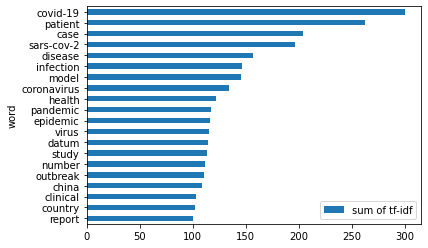

In [7]:
# words which are used most frequently
word_count = pd.DataFrame({'word': vectorizer.get_feature_names(), 'sum of tf-idf': np.asarray(data_vectorized.sum(axis=0))[0]})

word_count.sort_values('sum of tf-idf', ascending=False).set_index('word')[:20].sort_values('sum of tf-idf', ascending=True).plot(kind='barh')

# Using Cosine Similarity finding out the top 'N' documents--

In [8]:
def compute_cosine_similarity(doc_features, corpus_features, top_n=14):
    # get document in vectors form
    doc_features = doc_features.toarray()[0]
    corpus_features = corpus_features.toarray()
    # computing similarites between documents
    similarity = np.dot(doc_features, corpus_features.T)
    # finding out the highest similarity document score
    top_docs = similarity.argsort()[::-1][:top_n]
    top_docs_with_score = [(index, round(similarity[index], 3)) for index in top_docs]
    
    return top_docs_with_score

In [9]:
from IPython.display import display, HTML
import numpy as np
#Finding out the most releveant papers to a given query and display them
def SearchDocuments(Query):
    query_docs_tfidf = vectorizer.transform(Query) #Vectorizing and calculating tf-idf 

    for index, doc in enumerate(Query):
        doc_tfidf = query_docs_tfidf[index]
        #Computing Cosine similarty between the query and the abstracts and find out the most relevant paper
        top_similar_docs = compute_cosine_similarity(doc_tfidf, data_vectorized, top_n=14)
        
        df = pd.DataFrame()
        Score=[]
        for doc_index, sim_score in top_similar_docs :
            #taking out the full data of the 14 most relevant papers and add them to the dataframe
            data =meta_df.loc[meta_df['cord_uid'] == covid_research_papers.cord_uid.values[doc_index]]
            Score.append(str(sim_score))
            df = df.append(data)

        df['Score']=Score
        
        DisplayTable(df)
        
def AnswerSearchQuery(Query):
    query_docs_tfidf = vectorizer.transform(Query) 

    for index, doc in enumerate(Query):
        doc_tfidf = query_docs_tfidf[index]
        top_similar_docs = compute_cosine_similarity(doc_tfidf, data_vectorized, top_n=1)
        result = covid_abstract.values[top_similar_docs[0][0]].split('Results: ')
        if(len(result)==1):
            print(covid_abstract.values[top_similar_docs[0][0]])
        else:
            print(result[1])

# METHOD 
which gives an output on given questions:---

In [10]:
def DisplayTable(df):
    df = df.replace(np.nan, '', regex=True)
    df['Title'] = df['title'] + '#' + df['url']
    df =df[['Title','publish_time','abstract','Score']]
    dfStyler =df.style.format({'Title': make_clickable_both,'text-align': 'right'})
    dfStyler = dfStyler.set_properties(**{'text-align': 'left'})
    dfStyler=dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])
    display(HTML(dfStyler.render()))
#Making the title of the paper in the table as Hyperlink so that we get full access of the research paper    
def make_clickable_both(val): 
    
    name, url = val.split('#')
    if(url==''):
        return name
    return f'<a href="{url}">{name}</a>'

# Queries related to Covid-19:

In [11]:
SearchDocuments(['COVID-19 factors which effect badly'])

,Title,publish_time,abstract,Score
37684,SARS-CoV-2 infection in a patient on chronic hydroxychloroquine therapy: Implications for prophylaxis,2020-12-31,"Abstract People exposed to COVID-19 have a risk of developing disease, and health care workers are at risk at a time when they are badly needed during a health care crisis. Hydroxychloroquine and chloroquine have been used as treatment and are being considered as prophylaxis. Our patient developed COVID-19 while on hydroxychloroquine and although more work is needed, this calls into question the role of these medications as preventive therapy.",0.294
45846,Facilitating Access to Multilingual COVID-19 Information via Neural Machine Translation,2020-05-01,"Every day, more people are becoming infected and dying from exposure to COVID-19. Some countries in Europe like Spain, France, the UK and Italy have suffered particularly badly from the virus. Others such as Germany appear to have coped extremely well. Both health professionals and the general public are keen to receive up-to-date information on the effects of the virus, as well as treatments that have proven to be effective. In cases where language is a barrier to access of pertinent information, machine translation (MT) may help people assimilate information published in different languages. Our MT systems trained on COVID-19 data are freely available for anyone to use to help translate information published in German, French, Italian, Spanish into English, as well as the reverse direction.",0.182
40379,Multivariate Analysis of Factors Affecting COVID-19 Case and Death Rate in U.S. Counties: The Significant Effects of Black Race and Temperature,2020-04-22,"Objectives: Coronavirus disease-19 (COVID-19) has spread rapidly around the world, and many risk factors including patient demographics, social determinants of health, environmental variables, underlying health conditions, and adherence to social distancing have been hypothesized to affect case and death rates. However, little has been done to account for the potential confounding effects of these factors. Using a large multivariate analysis, this study illuminates modulators of COVID-19 incidence and mortality in U.S. counties while controlling for risk factors across multiple domains. Methods: Data on COVID-19 and various risk factors in all U.S. counties was collected from publicly available data sources through April 14, 2020. Counties with at least 50 COVID-19 cases were included in case analyses and those with at least 10 deaths were included in mortality models. The 661 counties meeting inclusion criteria for number of cases were grouped into quartiles and comparisons of risk factors were made using t-tests between the highest and lowest quartiles. Similar comparisons for 217 counties were made for above average and below average deaths/100,000. Adjusted linear and logistic regression analyses were performed to evaluate the independent effects of factors that significantly impacted cases and deaths. Results: Univariate analyses demonstrated numerous significant differences between cohorts for both cases and deaths. Risk factors associated with increased cases and/or deaths per 100,000 included increased GDP per capita, decreased social distancing, increased age, increased percent Black, decreased percent Hispanic, decreased percent Asian, decreased health, increased poverty, increased diabetes, increased coronary heart disease, increased physical inactivity, increased alcohol consumption, increased tobacco use, and decreased access to primary care. Multivariate regression analyses demonstrated Black race is a risk factor for worse COVID-19 outcome independent of comorbidities, poverty, access to health care, and other mitigating factors. Lower daily temperatures was also an independent risk factor in case load but not deaths. Conclusions: U.S. counties with a higher proportion of Black residents are associated with increased COVID-19 cases and deaths. However, the

In [12]:
SearchDocuments(['Data on factors which are potential to make it more serious virus'])

,Title,publish_time,abstract,Score
40033,Coronavirus epidemic: prediction and controlling measures,2020-04-17,"The COVID-19 outbreak has caused over 1.7 million (still increasing) confirmed cases globally as of April 10th, 2020. The levels of spread and severity of the virus lead to a wide-spread political and economic turmoil. We believe that two critical contributing factors need to be taken into account by the authorities to make effective decisions for controlling the spread of the virus: (i) being familiar with the most effective controlling measures and (ii) having a mathematical model to predict the spread of the virus. In this study, we provided information regarding both of these crucial factors. First, we investigated the importance of different measures such as quarantine, isolation, face mask, social distancing, etc. in controlling the virus in various countries. We then present a mathematical model to predict the spread of the virus in different countries. Our prediction shows an excellent match with the actual data up to now.",0.253
40379,Multivariate Analysis of Factors Affecting COVID-19 Case and Death Rate in U.S. Counties: The Significant Effects of Black Race and Temperature,2020-04-22,"Objectives: Coronavirus disease-19 (COVID-19) has spread rapidly around the world, and many risk factors including patient demographics, social determinants of health, environmental variables, underlying health conditions, and adherence to social distancing have been hypothesized to affect case and death rates. However, little has been done to account for the potential confounding effects of these factors. Using a large multivariate analysis, this study illuminates modulators of COVID-19 incidence and mortality in U.S. counties while controlling for risk factors across multiple domains. Methods: Data on COVID-19 and various risk factors in all U.S. counties was collected from publicly available data sources through April 14, 2020. Counties with at least 50 COVID-19 cases were included in case analyses and those with at least 10 deaths were included in mortality models. The 661 counties meeting inclusion criteria for number of cases were grouped into quartiles and comparisons of risk factors were made using t-tests between the highest and lowest quartiles. Similar comparisons for 217 counties were made for above average and below average deaths/100,000. Adjusted linear and logistic regression analyses were performed to evaluate the independent effects of factors that significantly impacted cases and deaths. Results: Univariate analyses demonstrated numerous significant differences between cohorts for both cases and deaths. Risk factors associated with increased cases and/or deaths per 100,000 included increased GDP per capita, decreased social distancing, increased age, increased percent Black, decreased percent Hispanic, decreased percent Asian, decreased health, increased poverty, increased diabetes, increased coronary heart disease, increased physical inactivity, increased alcohol consumption, increased tobacco use, and decreased access to primary care. Multivariate regression analyses demonstrated Black race is a risk factor for worse COVID-19 outcome independent of comorbidities, poverty, access to health care, and other mitigating factors. Lower daily temperatures was also an independent risk factor in case load but not deaths. Conclusions: U.S. counties with a higher proportion of Black residents are associated with increased COVID-19 cases and deaths. However, the various suggested mechanisms, such as socioeconomic and healthcare predispositions, did not appear to drive the effect of race in our model. Counties with higher average daily temperatures are also associated with decreased COVID-19 cases but not deaths. Several theories are posited to explain these findings, including prevalence of vitamin D deficiency. Additional studies are needed to further understand these effects.",0.221
38830,Impacts of social and econ

In [13]:
SearchDocuments(['Some other factors such as Smoking, pre-existing pulmonary disease which can help this virus'])

In [14]:
SearchDocuments(['Some other factors such as Co-infections (determine whether co-existing respiratory/viral infections make the virus more transmissible or exteremely severe) and other comorbidities'])

,Title,publish_time,abstract,Score
52862,Co-infection with SARS-CoV-2 and influenza A virus,2020-04-21,"Coronavirus Disease 2019 (COVID-19) infection, caused by severe acute respiratory syndrome coronavirus-2 (SARS-CoV-2), is spreading globally and poses a major public health threat. We reported a case of influenza A virus and SARS-CoV-2 co-infection. As the number of COVID-19 cases increase, it will be necessary to comprehensively evaluate imaging and other clinical findings as well as consider co-infection with other respiratory viruses.",0.3
19514,Bacterial and fungal co-infection in individuals with coronavirus: A rapid review to support COVID-19 antimicrobial prescribing,2020-05-02,"BACKGROUND: To explore and describe the current literature surrounding bacterial/fungal co-infection in patients with coronavirus infection. METHODS: MEDLINE, EMBASE, and Web of Science were searched using broad based search criteria relating to coronavirus and bacterial co-infection. Articles presenting clinical data for patients with coronavirus infection (defined as SARS-1, MERS, SARS-COV-2, and other coronavirus) and bacterial/fungal co-infection reported in English, Mandarin, or Italian were included. Data describing bacterial/fungal co-infections, treatments, and outcomes were extracted. Secondary analysis of studies reporting antimicrobial prescribing in SARS-COV-2 even in the absence of co-infection was performed. RESULTS: 1007 abstracts were identified. Eighteen full texts reported bacterial/fungal co-infection were included. Most studies did not identify or report bacterial/fungal coinfection (85/140;61%). 9/18 (50%) studies reported on COVID-19, 5/18 (28%) SARS-1, 1/18 (6%) MERS, and 3/18 (17%) other coronavirus. For COVID-19, 62/806 (8%) patients were reported as experiencing bacterial/fungal co-infection during hospital admission. Secondary analysis demonstrated wide use of broad-spectrum antibacterials, despite a paucity of evidence for bacterial coinfection. On secondary analysis, 1450/2010 (72%) of patients reported received antimicrobial therapy. No antimicrobial stewardship interventions were described. For non-COVID-19 cases bacterial/fungal co-infection was reported in 89/815 (11%) of patients. Broad-spectrum antibiotic use was reported. CONCLUSIONS: Despite frequent prescription of broad-spectrum empirical antimicrobials in patients with coronavirus associated respiratory infections, there is a paucity of data to support the association with respiratory bacterial/fungal co-infection. Generation of prospective evidence to support development of antimicrobial policy and appropriate stewardship interventions specific for the COVID-19 pandemic are urgently required.",0.224
35509,Child with liver transplant recovers from COVID-19 infection. A case report,2020-05-06,"Abstract We present the case of a 55-month-old girl who recovered from coronavirus disease 2019 (COVID-19) infection 5 months after undergoing liver transplantation; she had a co-infection with Epstein–Barr virus (EBV). To the best of our knowledge, this is the first case report of a COVID-19 infection in a pediatric patient with liver transplantation. Additionally, this is also the first report of confirmed co-infection between COVID-19 and EBV. On the basis of this case, we suggest that liver transplantation is not associated with COVID-19 symptom severity and development. Moreover, COVID-19 and EBV co-infections do not seem to aggravate the clinical outcome.",0.194
31247,"Co-infection with SARS-CoV-2 and Influenza A Virus in Patient with Pneumonia, China",2020-06-01,"We report co-infection with severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) and influenza A virus in a patient with pneumonia in China. The case highlights possible co-detection of known respiratory viruses. We noted low sensitivity of upper respiratory specimens for SARS-CoV-2, which could further complicate recognition of the full extent of disease.",0.186
61313,"Clinical features and 

In [15]:
SearchDocuments(['Scenario related to New born child and pregnant women'])

,Title,publish_time,abstract,Score
39068,Clinical features and the maternal and neonatal outcomes of pregnant women with coronavirus disease 2019,2020-03-27,"BACKGROUND There is little information about the coronavirus disease 2019 (Covid-19) during pregnancy. This study aimed to determine the clinical features and the maternal and neonatal outcomes of pregnant women with Covid-19. METHODS In this retrospective analysis from five hospitals, we included pregnant women with Covid-19 from January 1 to February 20, 2020. The primary composite endpoints were admission to an intensive care unit (ICU), the use of mechanical ventilation, or death. Secondary endpoints included the clinical severity of Covid-19, neonatal mortality, admission to neonatal intensive care unit (NICU), and the incidence of acute respiratory distress syndrome (ARDS) of pregnant women and newborns. RESULTS Thirty-three pregnant women with Covid-19 and 28 newborns were identified. One (3%) pregnant woman needed the use of mechanical ventilation. No pregnant women admitted to the ICU. There were no moralities among pregnant women or newborns. The percentages of pregnant women with mild, moderate, and severe symptoms were 13 (39.4%),19(57.6%), and 1(3%). One (3.6%) newborn developed ARDS and was admitted to the NICU. The rate of perinatal transmission of SARS-CoV-2 was 3.6%. CONCLUSIONS This report suggests that pregnant women are not at increased risk for severe illness or mortality with Covid-19 compared with the general population. The SARS-CoV-2 infection during pregnancy might not be associated with as adverse obstetrical and neonatal outcomes that are seen with the severe acute respiratory syndrome coronavirus (SARS-CoV) and Middle East respiratory syndrome coronavirus (MERS-CoV) infection during pregnancy. (Funded by the National Key Research and Development Program.)",0.487
32824,Maternal Death Due to COVID-19 Disease,2020-04-28,"Abstract Background Despite 2.5 million infections and 169,000 deaths worldwide (current as of April 20, 2020), no maternal deaths and only a few pregnant women afflicted with severe respiratory morbidity had been reported to be related to COVID-19 disease. Given the disproportionate burden of severe and mortal respiratory disease previously documented among pregnant women following other related coronavirus outbreaks (SARS-CoV in 2003 and MERS-CoV) and influenza pandemics over the last century, the absence of reported maternal morbidity and mortality with COVID-19 disease is unexpected. Objectives To describe maternal and perinatal outcomes and death in a case series of pregnant women with COVID-19 disease. Study design We describe here a multi-institution adjudicated case series from Iran which includes 9 pregnant women diagnosed with severe COVID-19 disease during their latter 2nd or 3rd trimester. All 9 pregnant women were diagnosed with SARS-CoV-2 infection by rRT-PCR nucleic acid testing (NAT). Outcomes of these women were compared to their familial/household members with exposure to the affected patient on or after their symptom onset. All data were reported at death or after a minimum of 14 days from date of admission with COVID-19 disease. Results Among 9 pregnant women with severe COVID-19 disease, at the time of reporting 7 of 9 died, 1 of 9 remains critically ill and ventilator-dependent, and 1 of 9 recovered after prolonged hospitalization. We obtained self-verified familial/household cohort data in all 9 cases, and in each and every instance the maternal outcomes were more severe when compared to other high and low-risk familial/household members (n=33 members for comparison). Conclusion We report herein maternal deaths due to COVID-19 disease. Until rigorously collected surveillance data emerges, it is prudent to be aware of the potential for maternal death among pregnant women diagnosed with COVID-19 disease in their latter trimester(s).",0.44
46288,Investigation on demands for antenatal care services among 2 002 

In [16]:
SearchDocuments(['Covid-19 effectness on Socio-economic and behavioral factors so that understand the economic impact of the virus and whether there were differences?'])

,Title,publish_time,abstract,Score
45838,On the dynamics emerging from pandemics and infodemics,2020-04-19,"This position paper discusses emerging behavioral, social, and economic dynamics related to the COVID-19 pandemic and puts particular emphasis on two emerging issues: First, delayed effects (or second strikes) of pandemics caused by dread risk effects are discussed whereby two factors which might influence the existence of such effects are identified, namely the accessibility of (mis-)information and the effects of policy decisions on adaptive behavior. Second, the issue of individual preparedness to hazardous events is discussed. As events such as the COVID-19 pandemic unfolds complex behavioral patterns which are hard to predict, sophisticated models which account for behavioral, social, and economic dynamics are required to assess the effectivity and efficiency of decision-making.",0.294
40237,The socio-economic determinants of the coronavirus disease (COVID-19) pandemic,2020-04-17,"The magnitude of the coronavirus disease (COVID-19) pandemic has an enormous impact on the social life and the economic activities in almost every country in the world. Besides the biological and epidemiological factors, a multitude of social and economic criteria also govern the extent of the coronavirus disease spread in the population. Consequently, there is an active debate regarding the critical socio-economic determinants that contribute to the resulting pandemic. In this paper, we contribute towards the resolution of the debate by leveraging Bayesian model averaging techniques and country level data to investigate the potential of 35 determinants, describing a diverse set of socio-economic characteristics, in explaining the coronavirus pandemic outcome.",0.284
45491,The socio-economic determinants of the coronavirus disease (COVID-19) pandemic,2020-04-14,"The magnitude of the coronavirus disease (COVID-19) pandemic has an enormous impact on the social life and the economic activities in almost every country in the world. Besides the biological and epidemiological factors, a multitude of social and economic criteria also govern the extent of the coronavirus disease spread in the population. Consequently, there is an active debate regarding the critical socio-economic determinants that contribute to the resulting pandemic. In this paper, we contribute towards the resolution of the debate by leveraging Bayesian model averaging techniques and country level data to investigate the potential of 29 determinants, describing a diverse set of socio-economic characteristics, in explaining the coronavirus pandemic outcome. We show that the true mathematical model of the coronavirus outcome is constituted only of few determinants, but the extent to which each determinant is able to provide an adequate explanation varies between countries due to their heterogeneous socioeconomic structures. To understand the relationship between the socio-economic determinants in the specification of the true model we develop the coronavirus determinants Jointness space. In this space, the potential determinants are linked with each other by their ability to jointly explain the coronavirus outcome. As such the Jointness space can be efficiently implemented for developing socio-economic policies aimed at prevention of future epidemic crises.",0.257
36815,COVID-19 and finance: Agendas for future research,2020-04-12,"Abstract This paper highlights the enormous economic and social impact of COVID-19 with respect to articles that have either prognosticated such a large-scale event, and its economic consequences, or have assessed the impacts of other epidemics and pandemics. A consideration of possible impacts of COVID-19 on financial markets and institutions, either directly or indirectly, is briefly outlined by drawing on a variety of literatures. A consideration of the characteristics of COVID-19, along with what research suggests have been the impacts of other past

In [17]:
SearchDocuments(['Spreadness dynamics of the virus, including some of the basic reproductive number, incubation period, serial interval, modes of forwarded to others and environmental role in this'])

,Title,publish_time,abstract,Score
38723,Estimation of incubation period distribution of COVID-19 using disease onset forward time: a novel cross-sectional and forward follow-up study,2020-03-10,"Background: The current outbreak of coronavirus disease 2019 (COVID-19) has quickly spread across countries and become a global crisis. However, one of the most important clinical characteristics in epidemiology, the distribution of the incubation period, remains unclear. Different estimates of the incubation period of COVID-19 were reported in recent published studies, but all have their own limitations. In this study, we propose a novel low-cost and accurate method to estimate the incubation distribution. Methods: We have conducted a cross-sectional and forward follow-up study by identifying those asymptomatic individuals at their time of departure from Wuhan and then following them until their symptoms developed. The renewal process is hence adopted by considering the incubation period as a renewal and the duration between departure and symptom onset as a forward recurrence time. Under mild assumptions, the observations of selected forward times can be used to consistently estimate the parameters in the distribution of the incubation period. Such a method enhances the accuracy of estimation by reducing recall bias and utilizing the abundant and readily available forward time data. Findings: The estimated distribution of forward time fits the observations in the collected data well. The estimated median of incubation period is 8.13 days (95% confidence interval [CI]: 7.37-8.91), the mean is 8.62 days (95% CI: 8.02-9.28), the 90th percentile is 14.65 days (95% CI: 14.00-15.26), and the 99th percentile is 20.59 days (95% CI: 19.47, 21.62). Compared with results in other studies, the incubation period estimated in this study is longer. Interpretation: Based on the estimated incubation distribution in this study, about 10% of patients with COVID-19 would not develop symptoms until 14 days after infection. Further study of the incubation distribution is warranted to directly estimate the proportion with long incubation periods.",0.341
50695,Serial interval of novel coronavirus (COVID-19) infections,2020,"Objective To estimate the serial interval of novel coronavirus (COVID-19) from information on 28 infector-infectee pairs. Methods We collected dates of illness onset for primary cases (infectors) and secondary cases (infectees) from published research articles and case investigation reports. We subjectively ranked the credibility of the data and performed analyses on both the full dataset (n = 28) and a subset of pairs with highest certainty in reporting (n = 18). In addition, we adjust for right truncation of the data as the epidemic is still in its growth phase. Results Accounting for right truncation and analyzing all pairs, we estimated the median serial interval at 4.0 days (95% credible interval [CrI]: 3.1, 4.9). Limiting our data to only the most certain pairs, the median serial interval was estimated at 4.6 days (95% CrI: 3.5, 5.9). Conclusions The serial interval of COVID-19 is close to or shorter than its median incubation period. This suggests that a substantial proportion of secondary transmission may occur prior to illness onset. The COVID-19 serial interval is also shorter than the serial interval of severe acute respiratory syndrome (SARS), indicating that calculations made using the SARS serial interval may introduce bias.",0.316
38300,Serial interval of novel coronavirus (2019-nCoV) infections,2020-02-13,"Objective: To estimate the serial interval of novel coronavirus (COVID-19) from information on 28 infector-infectee pairs. Methods: We collected dates of illness onset for primary cases (infectors) and secondary cases (infectees) from published research articles and case investigation reports. We subjectively ranked the credibility of the data and performed analyses on both the full dataset (n=28) and a subset of pairs 

In [18]:
SearchDocuments(['Virus severity or its impact, including effectness in fatality among symptomatic hospitalized patients, and very low immune system or high-risk patient groups'])

,Title,publish_time,abstract,Score
36158,"Comparison of mortality associated with respiratory viral infections between December 2019 and March 2020 with that of the previous year, Southeastern France",2020-05-07,"Abstract Respiratory viruses are a major global cause of mortality worldwide and in France where they cause several thousands of deaths yearly. University Hospital Institute-Méditerranée Infection performs real-time surveillance of all diagnoses of infections and associated deaths in public hospitals of Marseille, Southeastern France. Here, mortality associated with diagnoses of respiratory viruses was compared during colder months of 2018-2019 and 2019-2020 (week 47-week 14). In 2018-2019, 73 patients (0.17% of 42,851 hospitalized patients) died after being diagnosed with a respiratory virus; 40 and 13 deaths occurred in patients diagnosed with influenza A virus and respiratory syncytial virus (RSV), respectively. In 2019-2020, 50 patients (0.10% of 49,043 patients hospitalized) died after being diagnosed with a common respiratory virus; 7 and 7 deaths occurred in patients diagnosed with influenza A virus and RSV, respectively. Additionally, 55 patients died after being diagnosed with SARS-CoV-2. The proportion of respiratory virus-associated deaths among hospitalized patients was thus significantly lower for common respiratory viruses in 2019-2020 than in 2018-2019 (102 versus 170 per 100,000 hospitalized patients; p=0.003), majoritarily as a consequence of a decrease in influenza A virus (-83%) and RSV (-46%)-associated deaths. Overall, the proportion of respiratory virus-associated deaths among hospitalized patients was higher but not significantly in 2019-2020 than in 2018-2019 (214 versus 170 per 100,000 hospitalized patients; p=0.08, Yates-corrected chi-square test). These findings allow putting into perspective the death burden of SARS-CoV-2 infections in our geographical area.",0.253
40601,COVID-19 Fatality and Comorbidity Risk Factors among Confirmed Patients in Mexico,2020-04-25,"As of April 18, 2020, 2.16 million patients in the world had been tested positive with Coronavirus (COVID-19) and 146,088 had died, which accounts for a case fatality rate of 6.76%. In Mexico, according to official statistics (April 18), 7,497 cases have been confirmed with 650 deaths, for a case fatality rate of 8.67%. These estimates, however, may not reflect the final fatality risk among COVID-19 confirmed patients, because they are based on cross-sectional counts of diagnosed and deceased patients, and therefore are not adjusted by time of exposure and right-censorship. In this paper we estimate fatality risks based on survival analysis methods, calculated from individual-level data on symptomatic patients confirmed with COVID-19 recently released by the Mexican Ministry of Health. The estimated fatality risk after 35 days of onset of symptoms is 12.38% (95% CI: 11.37-13.47). Fatality risks sharply rise with age, and significantly increase for males (59%) and individuals with comorbidities (38%-168%, depending on the disease). Two reasons may explain the high COVID-19 related fatality risk observed in Mexico, despite its younger age structure: the high selectivity and self-selectivity in testing and the high prevalence of chronic-degenerative diseases.",0.24
56017,Clinical characteristics of older patients infected with COVID-19: A descriptive study,2020-08-31,"Abstract Objectives Since the outbreak of 2019 novel coronavirus (COVID-19), which has spread in the world rapidly. Population have a susceptibility to COVID-19, older people were more susceptible to have a variety diseases than younger, including COVID-19 infection with no doubt. This study focused on older patients with COVID-19 infection and analyzed the epidemiological and clinical characteristics of them. Methods We collected information on confirmed older patient transferred by Beijing Emergency Medical Service (EMS) to the designated hospitals from Jan 20 to Feb 2

In [21]:
SearchDocuments(['populations which having high rate of sensitiveness or badly effected by this virus means susceptibility in patient as well as people '])

,Title,publish_time,abstract,Score
37684,SARS-CoV-2 infection in a patient on chronic hydroxychloroquine therapy: Implications for prophylaxis,2020-12-31,"Abstract People exposed to COVID-19 have a risk of developing disease, and health care workers are at risk at a time when they are badly needed during a health care crisis. Hydroxychloroquine and chloroquine have been used as treatment and are being considered as prophylaxis. Our patient developed COVID-19 while on hydroxychloroquine and although more work is needed, this calls into question the role of these medications as preventive therapy.",0.237
45846,Facilitating Access to Multilingual COVID-19 Information via Neural Machine Translation,2020-05-01,"Every day, more people are becoming infected and dying from exposure to COVID-19. Some countries in Europe like Spain, France, the UK and Italy have suffered particularly badly from the virus. Others such as Germany appear to have coped extremely well. Both health professionals and the general public are keen to receive up-to-date information on the effects of the virus, as well as treatments that have proven to be effective. In cases where language is a barrier to access of pertinent information, machine translation (MT) may help people assimilate information published in different languages. Our MT systems trained on COVID-19 data are freely available for anyone to use to help translate information published in German, French, Italian, Spanish into English, as well as the reverse direction.",0.172
39568,"Anxiety, worry and perceived stress in the world due to the COVID-19 pandemic, March 2020. Preliminary results.",2020-04-06,"Introduction: Since the beginning of the outbreak in China, ending 2019, the Novel Coronavirus (COVID-19) has spread subsequently to the rest of the world causing an on-going pandemic. The World Health Organisation (WHO) declared COVID-19: a public health emergency of international concern. Having into consideration the lockdown and quarantine situation, we decided to do evaluate the current emotional state on the general population with a web-based survey in English and in Spanish, which was considered a useful and fast method that could help us determine how people perceived stress and worry due to the COVID-19. Methods: The survey included a 22 items, gathering information in 3 sections: Sociodemographic data, the Perceived Stress Scale (PSS-10) by Cohen and additional queries that assessed the current worry and change of behaviours due to this pandemic. Results: The survey received 891 respondents from 25 countries, from March 17 to 23rd, 2020. The mean age of the respondents was 43.8 (14.2) years old, and more than two thirds were women. 12.8% were health personnel.The mean of the PSS-10 score was 17.4 (6.4). Significantly higher scores were observed among women, youth, students, and among those who expressed concern and those who perceived increased susceptibility to the COVID-19. In contrast, no significant differences were observed between the health professionals and the general population. A good correlation was observed between mean relative volume (RSV) of the las 14 days and the number of cases reported (rho = 0.68, p <0.001) and deaths (rho = 0.51, p <0.001). Discussion: With these results we describe an increase of affective symptoms due to the COVID-19. This pandemic is raising the anxiety levels. The findings of our study show the affective and cognitive alterations people are going through. This survey is the first attempt to measure the psychological consequences this pandemic is having, in order to be able to later be able to provide the support to confront this global issue, addressing the mental health care that will be needed.",0.165
40429,"The association between age, COVID-19 symptoms, and social distancing behavior in the United States",2020-04-23,"Abstract Background Public health authorities recommend that people practice social distancing, especially if they have symptoms

In [24]:
SearchDocuments(['Public health mitigation measures that could be effective for control'])

,Title,publish_time,abstract,Score
40380,Years of life lost due to the psychosocial consequences of COVID19 mitigation strategies based on Swiss data,2020-04-22,"Background: The pandemic caused by COVID-19 has forced governments to implement strict social mitigation strategies to reduce the acute morbidity and mortality from acute infections. These strategies however carry a significant risk for mental health which can lead to increased short-term and long-term mortality, which is currently not included in modelling the impact of the pandemic. Methods: We used years of life lost (YLL) as the main outcome measure as applied to Switzerland as an exemplar. We focused on suicide, depression, alcohol use disorder, childhood physical abuse and social isolation as these are known to increase YLL in the context of imposed restriction in social contact and freedom of movement. We also estimated a minimum duration of mitigation of 3 months based on current public health plans. Results: The study projects that the average person would suffer 0.205 YLL due to psychosocial consequence of COVID-19 mitigation measures. However, this loss would be entirely borne by a subpopulation of 2.1 percent of the population, the average of whom suffer an average 9.79 YLL. Conclusions: The results presented here are likely to underestimate the true impact of the mitigation strategies on YLL. However, model like the one presented here highlight the need for public health models to expand their scope in order to provide better estimates of the risks and benefits of mitigation.",0.374
45407,Extracting the effective contact rate of COVID-19 pandemic,2020-04-16,"In the absence of any available vaccines or drugs, prevention of the spread of Coronavirus Disease 2019 (COVID-19) pandemic is being achieved by putting many mitigation measures in place. It is indispensable to have robust and reliable ways of evaluating the effectiveness of these measures. In this work, we assume that, at a very coarse-grained level of description, the overall effect of all the mitigation measures is that we can still describe the spread of the pandemic using the most basic Susceptible-Exposed-Infectious-Removed ($SEIR$) model but with an""effective contact rate""($\beta$) which is time-dependent. We then use the time series data of the number of infected individuals in the population to extract the instantaneous effective contact rate which is the result of various social interventions put in place. This approach has the potential to be significantly useful while evaluating the impact of mitigation measures on the spread of COVID-19 in near future.",0.36
35477,Initial impacts of global risk mitigation measures taken during the combatting of the COVID-19 pandemic,2020-04-15,"Abstract This paper presents an analysis of risk mitigation measures taken by countries around the world facing the current COVID-19 outbreak. In light of the current pandemic the authors collated and clustered (using harmonised terminology) the risk mitigation measures taken around the globe in the combat to contain, and since March 11 2020, to limit the spread of the SARS-CoV-2 virus known to cause the Coronavirus disease 2019 (COVID-19). This overview gathers lessons learnt, providing an update on the current knowledge for authorities, sectors and first responders on the effectiveness of said measures, and may allow enhanced prevention, preparedness and response for future outbreaks. Various measures such as mobility restrictions, physical distancing, hygienic measures, socio-economic restrictions, communication and international support mechanisms have been clustered and are reviewed in terms of the nature of the actions taken and their qualitative early-perceived impact. At the time of writing, it is still too premature to express the quantitative effectiveness of each risk mitigation cluster, but it seems that the best mitigation results are reported when applying a combination of voluntary and enforceable 

In [26]:
SearchDocuments(['Not following Social distancing what are the consequences of this?'])

,Title,publish_time,abstract,Score
40984,Social Distancing Has Merely Stabilized COVID-19 in the US,2020-04-30,"Social distancing measures, with varying degrees of restriction, have been imposed around the world in order to stem the spread of COVID-19. In this work we analyze the effect of current social distancing measures in the United States. We quantify the reduction in doubling rate, by state, that is associated with social distancing. We find that social distancing is associated with a statistically-significant reduction in the doubling rate for all but three states. At the same time, we do not find significant evidence that social distancing has resulted in a reduction in the number of daily confirmed cases. Instead, social distancing has merely stabilized the spread of the disease. We provide an illustration of our findings for each state, including point estimates of the effective reproduction number, R, both with and without social distancing. We also discuss the policy implications of our findings.",0.448
35841,Adolescents’ Motivations to Engage in Social Distancing during the COVID-19 Pandemic: Associations with Mental and Social Health,2020-05-08,"Abstract Purpose Reducing the spread of infection during the COVID-19 pandemic prompted recommendations for individuals to socially distance. Little is known about the extent to which youth are socially distancing, what motivations underlie their social distancing, and how these motivations are connected with amount of social distancing, mental health, and social health. Using a large sample of adolescents from across the US, this study examined adolescents’ motivations for social distancing, their engagement in social distancing, and their mental and social health. Methods Data were collected March 29th and 30th 2020, two-weeks after COVID-19 was declared a national emergency in the US. The sample consisted of 683 adolescents recruited using social media. A series of multiple linear regressions examined unique associations among adolescents’ motivations to engage in social distancing, perceived amount of social distancing, anxiety symptoms, depressive symptoms, burdensomeness, and belongingness. Results Almost all respondents (98.1%) reported engaging in at least a little social distancing. The most commonly reported motivations for social distancing concerned social responsibility and not wanting others to get sick. Motivations concerning state or city lockdowns, parental rules, and social responsibility were associated with greater social distancing, whereas motivations concerning no alternatives were associated with less social distancing. Specific motivations for social distancing were differentially associated with adolescents’ anxiety symptoms, depressive symptoms, burdensomeness, and belongingness. Conclusions Understanding adolescents’ motivations to engage in social distancing may inform strategies to increase social distancing engagement, reduce pathogen transmission, and identify individual differences in mental and social health during the COVID-19 pandemic.",0.399
40356,Mathematical modeling of COVID-19 containment strategies with considerations for limited medical resources,2020-04-22,"The outbreak of SARS-CoV-2 in China has spread around the world, infecting millions and causing governments to implement strict policies to counteract the spread of the disease. One of the most effective strategies in reducing the severity of the pandemic is social distancing, where members of the population systematically reduce their interactions with others to limit the transmission rate of the virus. However, the implementation of social distancing can be difficult and costly, making it imperative that both policy makers and the citizenry understand the potential benefits if done correctly and the risks if not. In this work, a mathematical model is developed to study the effects of social distancing on the spread of the SARS-CoV-2 virus in Canada. The model is based upon

In [46]:
SearchDocuments(['factors which supports to covid virus so that its impact will be huge in india'])

In [28]:
SearchDocuments(['antiviral treatment'])

,Title,publish_time,abstract,Score
44900,Antiviral therapy in management of COVID-19: a systematic review on current evidence,2020-04-06,"BACKGROUND: The purpose of the current systematic review is to evaluate the efficacy of antiviral therapies in treatment of COVID-19. In addition, clinical trials on the efficacy of antiviral therapies in the management of Severe Acute Respiratory Syndrome coronavirus (SARS-Cov) or Middle East Respiratory Syndrome coronavirus (MERS-CoV) have also been reviewed, in order to identify potential treatment options for COVID-19. METHOD: An extensive search was performed in Medline, Embase, Scopus, Web of Science and CENTRAL databases until the end of March 15, 2020. Two independent researchers performed the screening, and finally the related studies were included. RESULTS: Only one clinical trial on the efficacy of antiviral therapy in management of COVID-19 was found. The results depicted that adding Lopinavir-Ritonavir to the standard treatment regimen of patients with severe COVID-19 has no benefits. Moreover, 21 case-series and case-report studies reported the prescription of antiviral agents in COVID-19, none of which can be used to determine the efficacy of antiviral therapies in confronting COVID-19. In addition, no clinical trials were found to be performed on the efficacy of antiviral agents in the management of SARS-CoV and MERS-CoV. CONCLUSION: The current evidence impede researchers from proposing an appropriate antiviral therapy against COVID-19, making the current situation a serious concern for international organizations such as World Health Organization (WHO). In the time of the current pandemic and future epidemics, organizations such as WHO should pursue more proactive actions and plan well-designed clinical trials so that their results can be used in managing future epidemics.",0.398
36263,"Vaporization, bioactive formulations and a marine natural product: different perspectives on antivirals",2020-04-20,"This article examines three aspects of antivirals, such as hydroxychloroquine, chloroquine, and remdesvir, as they might relate to the treatment of a viral infection such as COVID-19: (i) the use of vaporization for the delivery of antivirals, with the bulk constituents having mild antiviral efficacy; (ii) the application of a marine natural product extract as opposed to a single molecule as an antiviral agent; and (iii) a counter intuitive approach to formulation that is, in part, based on delivering multiple species that fall into three categories: building blocks for the virus to accelerate replication; an energy source for the infected cell to boost its immune response; and the species that antagonize or provide toxicity to the virus.",0.354
38736,Substrate specificity profiling of SARS-CoV-2 Mpro protease provides basis for anti-COVID-19 drug design,2020-03-08,"AbstractIn December 2019, the first cases of a novel coronavirus infection were diagnosed in Wuhan, China. Due to international travel and human-to-human transmission, the virus spread rapidly inside and outside of China. Currently, there is no effective antiviral treatment for COVID-19, therefore research efforts are focused on the rapid development of vaccines and antiviral drugs. The SARS-CoV-2 Mpro protease constitutes one of the most attractive antiviral drug targets. To address this emerging problem, we have synthesized a combinatorial library of fluorogenic substrates with glutamine in the P1 position. We used it to determine the substrate preferences of the SARS-CoV and SARS-CoV-2 proteases, using natural and a large panel of unnatural amino acids. The results of our work provide a structural framework for the design of inhibitors as antiviral agents or diagnostic tests.",0.336
19398,Antiviral treatment of COVID-19,2020-04-21,"Currently, there is not any specific effective antiviral treatment for COVID-19. Although most of the COVID-19 patients have mild or moderate courses, up to 5%–10% can have severe, po

In [32]:
SearchDocuments(['risk factor such as age'])

,Title,publish_time,abstract,Score
39647,The relationship of COVID-19 severity with cardiovascular disease and its traditional risk factors: A systematic review and meta-analysis,2020-04-07,"Background: Whether cardiovascular disease (CVD) and its traditional risk factors predict severe coronavirus disease 2019 (COVID-19) is uncertain, in part, because of potential confounding by age and sex. Methods: We performed a systematic review of studies that explored pre-existing CVD and its traditional risk factors as risk factors of severe COVID-19 (defined as death, acute respiratory distress syndrome, mechanical ventilation, or intensive care unit admission). We searched PubMed and Embase for papers in English with original data (≥10 cases of severe COVID-19). Using random-effects models, we pooled relative risk (RR) estimates and conducted meta-regression analyses. Results: Of the 373 publications identified in our search, 15 papers met our inclusion criteria, with 51,845 COVID-19 patients including 9,066 severe cases. Older age was consistently associated with severe COVID-19 in all eight eligible studies, with RR >~5 in >60-65 vs. <50 years. Two studies showed no change in the RR of age after adjusting for covariate(s). In univariate analyses, factors significantly associated with severe COVID-19 were male sex (14 studies; pooled RR=1.70, [95%CI 1.52-1.89]), hypertension (10 studies; 2.74 [2.12-3.54]), diabetes (11 studies; 2.81 [2.01-3.93]), and CVD (9 studies; 3.58 [2.06-6.21]). RR for male sex was likely to be independent of age. Meta-regression analyses were suggestive of confounding by age for the other three factors. Only two studies reported multivariable analysis, with one showing non-significant association for CVD and the other demonstrating adjusted RR ~2 for hypertension and diabetes. No study explored renin-angiotensin system inhibitors as a risk factor for severe COVID-19. Conclusions: In addition to older age and male sex, hypertension, diabetes, and CVD were associated in univariate analyses with severe COVID-19. Although there is still uncertainty regarding the magnitude of potential confounding, these risk factors can be used to inform objective decisions on COVID-19 testing, clinical management, and workforce planning.",0.367
40379,Multivariate Analysis of Factors Affecting COVID-19 Case and Death Rate in U.S. Counties: The Significant Effects of Black Race and Temperature,2020-04-22,"Objectives: Coronavirus disease-19 (COVID-19) has spread rapidly around the world, and many risk factors including patient demographics, social determinants of health, environmental variables, underlying health conditions, and adherence to social distancing have been hypothesized to affect case and death rates. However, little has been done to account for the potential confounding effects of these factors. Using a large multivariate analysis, this study illuminates modulators of COVID-19 incidence and mortality in U.S. counties while controlling for risk factors across multiple domains. Methods: Data on COVID-19 and various risk factors in all U.S. counties was collected from publicly available data sources through April 14, 2020. Counties with at least 50 COVID-19 cases were included in case analyses and those with at least 10 deaths were included in mortality models. The 661 counties meeting inclusion criteria for number of cases were grouped into quartiles and comparisons of risk factors were made using t-tests between the highest and lowest quartiles. Similar comparisons for 217 counties were made for above average and below average deaths/100,000. Adjusted linear and logistic regression analyses were performed to evaluate the independent effects of factors that significantly impacted cases and deaths. Results: Univariate analyses demonstrated numerous significant differences between cohorts for both cases and deaths. Risk factors associated with increased cases and/or deaths per 100,000 included increased GDP per capita, dec

In [37]:
SearchDocuments(['factors such as pollution'])

,Title,publish_time,abstract,Score
40091,A vulnerability-based approach to human-mobility reduction for countering COVID-19 transmission in London while considering local air quality,2020-04-17,"An ecologic analysis was conducted to explore the correlation between air pollution, and COVID-19 cases and fatality rates in London. The analysis demonstrated a strong correlation (R2>0.7) between increment in air pollution and an increase in the risk of COVID-19 transmission within London boroughs. Particularly, strong correlations (R2>0.72) between the risk of COVID-19 fatality and NO2 and PM2.5 pollution concentrations were also found. Although this study assumed the same level of air pollution across a particular London borough, it demonstrates the possibility to employ air pollution as an indicator to rapidly identify the vulnerable regions within a city. Such an approach can inform the decisions to suspend or reduce the operation of different public transport modes within a city. The methodology and learnings from the study can thus aid public transport to respond to the COVID-19 outbreak by adopting different levels of human-mobility reduction strategies based on the vulnerability of a given region.",0.475
34586,Can atmospheric pollution be considered a co-factor in extremely high level of SARS-CoV-2 lethality in Northern Italy?,2020-04-04,"Abstract This paper investigates the correlation between the high level of Severe Acute Respiratory Syndrome CoronaVirus 2 (SARS-CoV-2) lethality and the atmospheric pollution in Northern Italy. Indeed, Lombardy and Emilia Romagna are Italian regions with both the highest level of virus lethality in the world and one of Europe’s most polluted area. Based on this correlation, this paper analyzes the possible link between pollution and the development of acute respiratory distress syndrome and eventually death. We provide evidence that people living in an area with high levels of pollutant are more prone to develop chronic respiratory conditions and suitable to any infective agent. Moreover, a prolonged exposure to air pollution leads to a chronic inflammatory stimulus, even in young and healthy subjects. We conclude that the high level of pollution in Northern Italy should be considered an additional co-factor of the high level of lethality recorded in that area.",0.386
40975,Incidence of COVID-19 and Connections with Air Pollution Exposure: Evidence from the Netherlands,2020-05-03,"The fast spread of severe acute respiratory syndrome coronavirus 2 has resulted in the emergence of several hot-spots around the world. Several of these are located in areas associated with high levels of air pollution. This study investigates the relationship between exposure to particulate matter and COVID-19 incidence in 355 municipalities in the Netherlands. The results show that atmospheric particulate matter with diameter less than 2.5 is a highly significant predictor of the number of confirmed COVID-19 cases and related hospital admissions. The estimates suggest that expected COVID-19 cases increase by nearly 100 percent when pollution concentrations increase by 20 percent. The association between air pollution and case incidence is robust in the presence of data on health-related preconditions, proxies for symptom severity, and demographic control variables. The results are obtained with ground-measurements and satellite-derived measures of atmospheric particulate matter as well as COVID-19 data from alternative dates. The findings call for further investigation into the association between air pollution and SARS-CoV-2 infection risk. If particulate matter plays a significant role in COVID-19 incidence, it has strong implications for the mitigation strategies required to prevent spreading.",0.352
40670,Association between environmental pollution and prevalence of coronavirus disease 2019 (COVID-19) in Italy,2020-04-27,"The novel coronavirus disease 2019 (COVID-19) has recently been upgraded to a pandemic 

In [38]:
SearchDocuments(['risk factors such as population density'])

,Title,publish_time,abstract,Score
45409,Lived population density and the spread of COVID-19,2020-05-03,"We consider variations in the rate of spread of COVID-19, firstly comparing between European countries and secondly comparing between US states. We show that the population density has a small but significant effect on the rate of spread of the virus. However we show that measures of `lived population density', which capture density as perceived by a randomly chosen person, do a better job of explaining variations in the rate of spread, achieving $R^2 = 0.45$ in Europe. We show that adding further measures based on the timing of the outbreak into the regression can increase this to $R^2 = 0.58$.",0.397
40466,Community and Socioeconomic Factors Associated with COVID-19 in the United States: Zip code level cross sectional analysis,2020-04-22,"Background: Multiple reports have pointed towards involvement of community and socioeconomic characteristics of people in the United States may be associated with COVID-19 cases and deaths. Methods: In this study, zip-code level data from 5 major metropolitan areas, was utilized to study the effect of multiple demographic & socio-economic factors including race, age, income, chronic disease comorbidity, population density, number of people per household on number of positive cases and ensuing death. Adjusted linear regression analysis using 13 to 16 such variables was performed. Results: Overall, 442 zip codes reporting 93,170 positive COVID-19 cases and 138 zip codes reporting mortality ranging from 0 to 25 were included in this study. A multivariable linear regression model noted that 1% increase in the proportion of residents above the age of 65 years, proportion of African American residents, proportion of females, persons per household and population density of the zip code increased the proportion of positive cases by 0.77%, 0.23%, 1.64%, 1.83% and 0.46% respectively (P<0.01) with only population density remaining significant in zip codes with greater than median number of cases. In zips with greater than median number of deaths, no community/socio-economic factor contributed significantly to death. Conclusion: This study gives early signals of gender, and racial inequalities while providing overwhelming evidence of how population density may contribute to an increase in the number of positive cases of COVID-19.",0.298
39855,U.S. county-level characteristics to inform equitable COVID-19 response,2020-04-11,"The spread of Coronavirus Disease 2019 (COVID-19) across the United States confirms that not all Americans are equally at risk of infection, severe disease, or mortality. A range of intersecting biological, demographic, and socioeconomic factors are likely to determine an individual's susceptibility to COVID-19. These factors vary significantly across counties in the United States, and often reflect the structural inequities in our society. Recognizing this vast inter-county variation in risks will be critical to mounting an adequate response strategy. Using publicly available county-specific data we identified key biological, demographic, and socioeconomic factors influencing susceptibility to COVID-19, guided by international experiences and consideration of epidemiological parameters of importance. We created bivariate county-level maps to summarize examples of key relationships across these categories, grouping age and poverty; comorbidities and lack of health insurance; proximity, density and bed capacity; and race and ethnicity, and premature death. We have also made available an interactive online tool that allows public health officials to query risk factors most relevant to their local context. Our data demonstrate significant inter-county variation in key epidemiological risk factors, with a clustering of counties in certain states, which will result in an increased demand on their public health system. While the East and West coast cities are particularly vulnerable o

In [39]:
SearchDocuments(['one of the risk factors such as humidity?'])

In [40]:
SearchDocuments(['major risk factors such as heart risks'])

,Title,publish_time,abstract,Score
16508,"Understanding coronavirus disease (COVID-19) risk perceptions among the public to enhance risk communication efforts: a practical approach for outbreaks, Finland, February 2020",2020-04-02,"Understanding risk perceptions of the public is critical for risk communication. In February 2020, the Finnish Institute for Health and Welfare started collecting weekly qualitative data on coronavirus disease (COVID-19) risk perception that informs risk communication efforts. The process is based on thematic analysis of emails and social media messages from the public and identifies factors linked to appraisal of risk magnitude, which are developed into risk communication recommendations together with health and communication experts.",0.275
40379,Multivariate Analysis of Factors Affecting COVID-19 Case and Death Rate in U.S. Counties: The Significant Effects of Black Race and Temperature,2020-04-22,"Objectives: Coronavirus disease-19 (COVID-19) has spread rapidly around the world, and many risk factors including patient demographics, social determinants of health, environmental variables, underlying health conditions, and adherence to social distancing have been hypothesized to affect case and death rates. However, little has been done to account for the potential confounding effects of these factors. Using a large multivariate analysis, this study illuminates modulators of COVID-19 incidence and mortality in U.S. counties while controlling for risk factors across multiple domains. Methods: Data on COVID-19 and various risk factors in all U.S. counties was collected from publicly available data sources through April 14, 2020. Counties with at least 50 COVID-19 cases were included in case analyses and those with at least 10 deaths were included in mortality models. The 661 counties meeting inclusion criteria for number of cases were grouped into quartiles and comparisons of risk factors were made using t-tests between the highest and lowest quartiles. Similar comparisons for 217 counties were made for above average and below average deaths/100,000. Adjusted linear and logistic regression analyses were performed to evaluate the independent effects of factors that significantly impacted cases and deaths. Results: Univariate analyses demonstrated numerous significant differences between cohorts for both cases and deaths. Risk factors associated with increased cases and/or deaths per 100,000 included increased GDP per capita, decreased social distancing, increased age, increased percent Black, decreased percent Hispanic, decreased percent Asian, decreased health, increased poverty, increased diabetes, increased coronary heart disease, increased physical inactivity, increased alcohol consumption, increased tobacco use, and decreased access to primary care. Multivariate regression analyses demonstrated Black race is a risk factor for worse COVID-19 outcome independent of comorbidities, poverty, access to health care, and other mitigating factors. Lower daily temperatures was also an independent risk factor in case load but not deaths. Conclusions: U.S. counties with a higher proportion of Black residents are associated with increased COVID-19 cases and deaths. However, the various suggested mechanisms, such as socioeconomic and healthcare predispositions, did not appear to drive the effect of race in our model. Counties with higher average daily temperatures are also associated with decreased COVID-19 cases but not deaths. Several theories are posited to explain these findings, including prevalence of vitamin D deficiency. Additional studies are needed to further understand these effects.",0.249
41057,Modifiable and non-modifiable risk factors for COVID-19: results from UK Biobank,2020-05-02,"Background Information on risk factors for COVID-19 is sub-optimal. We investigated demographic, lifestyle, socioeconomic, and clinical risk factors, and compared them to risk factors for pneumonia and influenza in 

In [41]:
SearchDocuments(['risk factors such as temperature'])

,Title,publish_time,abstract,Score
38511,Temperature significant change COVID-19 Transmission in 429 cities,2020-02-25,"Background There is no evidence supporting that temperature changes COVID-19 transmission. Methods We collected the cumulative number of confirmed cases of all cities and regions affected by COVID-19 in the world from January 20 to February 4, 2020, and calculated the daily means of the average, minimum and maximum temperatures in January. Then, restricted cubic spline function and generalized linear mixture model were used to analyze the relationships. Results There were in total 24,232 confirmed cases in China and 26 overseas countries. In total, 16,480 cases (68.01%) were from Hubei Province. The lgN rose as the average temperature went up to a peak of 8.72℃ and then slowly declined. The apexes of the minimum temperature and the maximum temperature were 6.70℃ and 12.42℃ respectively. The curves shared similar shapes. Under the circumstance of lower temperature, every 1℃ increase in average, minimum and maximum temperatures led to an increase of the cumulative number of cases by 0.83, 0.82 and 0.83 respectively. In the single-factor model of the higher-temperature group, every 1℃ increase in the minimum temperature led to a decrease of the cumulative number of cases by 0.86. Conclusion The study found that, to certain extent, temperature could significant change COVID-19 transmission, and there might be a best temperature for the viral transmission, which may partly explain why it first broke out in Wuhan. It is suggested that countries and regions with a lower temperature in the world adopt the strictest control measures to prevent future reversal.",0.511
56457,Association between climate variables and global transmission oF SARS-CoV-2,2020-08-10,"In this study, we aimed at analyzing the associations between transmission of and deaths caused by SARS-CoV-2 and meteorological variables, such as average temperature, minimum temperature, maximum temperature, and precipitation. Two outcome measures were considered, with the first aiming to study SARS-CoV-2 infections and the second aiming to study COVID-19 mortality. Daily data as well as data on SARS-CoV-2 infections and COVID-19 mortality obtained between December 1, 2019 and March 28, 2020 were collected from weather stations around the world. The country's population density and time of exposure to the disease were used as control variables. Finally, a month dummy variable was added. Daily data by country were analyzed using the panel data model. An increase in the average daily temperature by one degree Fahrenheit reduced the number of cases by approximately 6.4 cases/day. There was a negative correlation between the average temperature per country and the number of cases of SARS-CoV-2 infections. This association remained strong even with the incorporation of additional variables and controls (maximum temperature, average temperature, minimum temperature, and precipitation) and fixed country effects. There was a positive correlation between precipitation and SARS-CoV-2 transmission. Countries with higher rainfall measurements showed an increase in disease transmission. For each average inch/day, there was an increase of 56.01 cases/day. COVID-19 mortality showed no significant association with temperature.",0.432
33462,Impact of temperature on the dynamics of the COVID-19 outbreak in China,2020-04-23,"Abstract A COVID-19 outbreak emerged in Wuhan, China at the end of 2019 and developed into a global pandemic during March 2020. The effects of temperature on the dynamics of the COVID-19 epidemic in China are unknown. Data on COVID-19 daily confirmed cases and daily mean temperatures were collected from 31 provincial-level regions in mainland China between Jan. 20 and Feb. 29, 2020. Locally weighted regression and smoothing scatterplot (LOESS), distributed lag nonlinear models (DLNMs), and random-effects meta-analysis were used to examine the relationship be

# Answering Queries
Due to data preprocessing which is done in an accurate way so that our model will return answers to most of the queries--

In [42]:
AnswerSearchQuery(['Some other factors such as Smoking, pre-existing pulmonary disease which can help this virus'])

We identified 12 papers with a total of 9,025 COVID-19 patients, 878 (9.7%) with severe disease and 495 with a history of smoking (5.5%). The meta-analysis showed a significant association between smoking and progression of COVID-19 (OR 2.25, 95% CI 1.49-3.39, p=0.001). Limitations in the 12 papers suggest that the actual risk of smoking may be higher. Conclusions: Smoking is a risk factor for progression of COVID-19, with smokers having higher odds of COVID-19 progression than never smokers. Physicians and public health professionals should collect data on smoking as part of clinical management and add smoking cessation to the list of practices to blunt the COVID-19 pandemic.


In [47]:
AnswerSearchQuery(['factors which supports to covid virus so that its impact will be huge in india'])

The outbreak of COVID-19 in different parts of the world is a major concern for all the administrative units of respective countries. India is also facing this very tough task for controlling the virus outbreak and has managed its growth rate through some strict measures. This study presents the current situation of coronavirus spread in India along with the impact of various measures taken for it. With the help of data sources (till 7th-8th April 2020) from various state units of India and Ministry of Health and Family Welfare, Government of India, this study presents various trends and patterns. This study answers six different research ques-tions in a comprehensive manner. It has been reported that growth rate of infected cases has been controlled with the help of National Lockdown, however some uncontrolled mass level events had negatively impacted the infected cases. With the help of exponential and polyno-mial regression modelling, the predictions of up to 75000 cases have been d

In [48]:
AnswerSearchQuery(['Transmission dynamics of the virus, including the basic reproductive number, incubation period, serial interval, modes of transmission and environmental factors'])

The mean incubation period was 7.1 (6.13, 8.25) days for Singapore and 9 (7.92, 10.2)days for Tianjin. Both datasets had shorter incubation periods for earlier-occurring cases. The mean serial interval was 4.56 (2.69, 6.42) days for Singapore and 4.22 (3.43, 5.01) for Tianjin. We inferred that early in the outbreaks, infection was transmitted on average 2.55 and 2.89days before symptom onset (Singapore, Tianjin). The estimated basic reproduction number for Singapore was 1.97 (1.45, 2.48) secondary cases per infective; for Tianjin it was 1.87 (1.65,2.09) secondary cases per infective. Conclusions: Estimated serial intervals are shorter than incubation periods in both Singapore and Tianjin, suggesting that pre-symptomatic transmission is occurring. Shorter serial intervals lead to lower estimates of R0, which suggest that half of all secondary infections should be prevented to control spread.


# User Dynamic Query

In [ ]:
print('Please Write down your own Query')

In [ ]:
Query= input()
SearchDocuments([Query])